***Nama : Laily Khoirunnisa'***

*Klasifikasi Data Rock-Paper-Scissors*

`Submission akhir Dicoding kelas Machine Learning untuk pemula`

<h1> <strong> 1. Import library dan mengambil dataset </strong></h1>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'

2.5.0
--2021-05-26 21:40:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.29MB/s    in 5m 37s  

2021-05-26 21:46:20 (936 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



<h1><strong>2. Membersihkan dataset dari file yang tidak diperlukan </strong></h2>

In [3]:
!rm -rf /tmp/rockpaperscissors/rps-cv-images
!rm /tmp/rockpaperscissors/README_rpc-cv-images.txt

<h1><strong>3. Membagi dataset dan menerapkan augmentasi</strong></h2>

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4) # set validation split

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=(100, 150),
    batch_size=32,
    class_mode='categorical', #karena lebih dari 2 kelas
    subset='validation') # set as validation data


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu',input_shape= (100,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 21760)             0

In [6]:
# Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and epoch > 5):
      print("\nAkurasi mencapai lebih dari 95%. \nMesin telah belajar dengan baik. \nHentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

<h1><strong>4. Memulai proses training dan pengujian akurasi</strong></h1>

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // 32,
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
41/41 - 50s - loss: 1.0220 - accuracy: 0.4953 - val_loss: 0.7061 - val_accuracy: 0.7211
Epoch 2/20
41/41 - 48s - loss: 0.4801 - accuracy: 0.8214 - val_loss: 0.3449 - val_accuracy: 0.8866
Epoch 3/20
41/41 - 48s - loss: 0.2887 - accuracy: 0.8846 - val_loss: 0.2319 - val_accuracy: 0.9259
Epoch 4/20
41/41 - 48s - loss: 0.2298 - accuracy: 0.9150 - val_loss: 0.2255 - val_accuracy: 0.9282
Epoch 5/20
41/41 - 48s - loss: 0.2065 - accuracy: 0.9267 - val_loss: 0.2232 - val_accuracy: 0.9294
Epoch 6/20
41/41 - 48s - loss: 0.1973 - accuracy: 0.9337 - val_loss: 0.2193 - val_accuracy: 0.9294
Epoch 7/20
41/41 - 48s - loss: 0.1535 - accuracy: 0.9524 - val_loss: 0.1931 - val_accuracy: 0.9317

Akurasi mencapai lebih dari 95%. 
Mesin telah belajar dengan baik. 
Hentikan training!


<h1><strong>5. Membuat Plot Tingkat Akurasi Data Training dan Validasi</strong></h2>

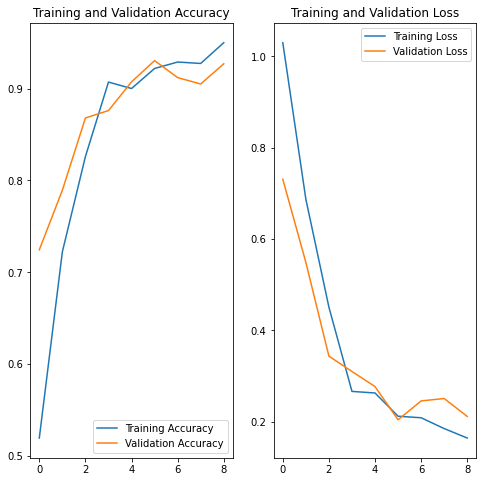

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h1><strong>6. Pengujian prediksi di luar data training dan dan validation</strong></h2>

Saving scissors_green.png to scissors_green (1).png
scissors_green.png
scissors


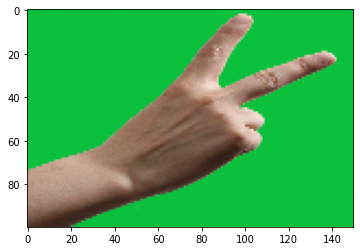

In [41]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
    myinput = 'paper'
  elif classes[0,1]!=0:
    print('rock')
    myinput = 'rock'
  else:
    print('scissors')
    myinput = 'scissors'

    

<h2><strong>You VS Computer, Who's going to win the game?</strong></h2>
<code>Game sederhana machine learning : Rock-Paper-Scissors</code>

Text(0.5, 1.0, "Computer's Hand : rock")

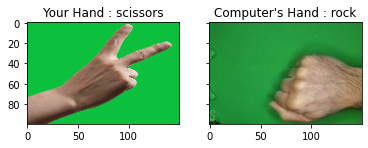

In [42]:
if myinput == 'paper':
    output = 'scissors'
    path_answer = '/tmp/rockpaperscissors/scissors/0657zSfiTYzP2jrl.png'
elif myinput == 'rock':
    output = 'paper'
    path_answer = '/tmp/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png'
else:
    output = 'rock'
    path_answer = '/tmp/rockpaperscissors/rock/00nKV8oHuTGi20gq.png'

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image.load_img(path, target_size=(100,150)))
ax1.set_title("Your Hand : "+myinput)
ax2.imshow(image.load_img(path_answer, target_size=(100,150)))
ax2.set_title("Computer's Hand : "+output)